In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz')

In [5]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis(list(lepping_db.all()), mask='/data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz', num_factors=100)

01/14/2019 21:22:37 Loading Nifti image /data/eli/sound_depression/fmriprep/sub-mdd16/func/sub-mdd16_task-music_run-5_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/14/2019 21:22:40 Loading Nifti image /data/eli/sound_depression/fmriprep/sub-mdd16/func/sub-mdd16_task-music_run-4_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/14/2019 21:22:43 Loading Nifti image /data/eli/sound_depression/fmriprep/sub-mdd16/func/sub-mdd16_task-nonmusic_run-2_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/14/2019 21:22:46 Loading Nifti image /data/eli/sound_depression/fmriprep/sub-mdd16/func/sub-mdd16_task-nonmusic_run-1_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /data/e

In [6]:
htfa.normalize_activations()

[tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(6.5550),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982),
 tensor(4.4982

In [7]:
losses = htfa.train(num_steps=1000, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=50, blocks_batch_size=12)

01/14/2019 21:33:21 [Epoch 1] (63439ms) Posterior free-energy 6.67886234e+09
01/14/2019 21:33:21 Saving checkpoint...
01/14/2019 21:34:25 [Epoch 2] (63755ms) Posterior free-energy 5.54999040e+09
01/14/2019 21:35:28 [Epoch 3] (63050ms) Posterior free-energy 4.73058611e+09
01/14/2019 21:36:31 [Epoch 4] (62797ms) Posterior free-energy 3.96981350e+09
01/14/2019 21:37:34 [Epoch 5] (63624ms) Posterior free-energy 3.48285670e+09
01/14/2019 21:38:38 [Epoch 6] (63360ms) Posterior free-energy 3.14543949e+09
01/14/2019 21:39:41 [Epoch 7] (63574ms) Posterior free-energy 2.88090470e+09
01/14/2019 21:40:45 [Epoch 8] (63504ms) Posterior free-energy 2.65605786e+09
01/14/2019 21:41:48 [Epoch 9] (63266ms) Posterior free-energy 2.50454246e+09
01/14/2019 21:42:52 [Epoch 10] (63726ms) Posterior free-energy 2.35849882e+09
01/14/2019 21:43:55 [Epoch 11] (63287ms) Posterior free-energy 2.20889984e+09
01/14/2019 21:44:58 [Epoch 12] (63330ms) Posterior free-energy 2.13709683e+09
01/14/2019 21:46:01 [Epoch 13] (

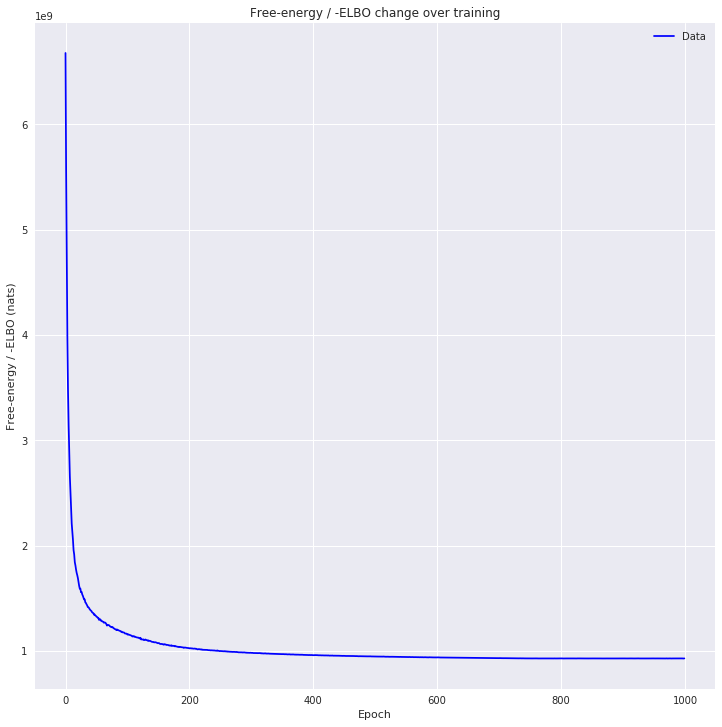

In [8]:
utils.plot_losses(losses)

In [13]:
import re

In [14]:
def subject_labeler(block):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(block.subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [15]:
def task_labeler(block):
    if block.task == 'negative_music':
        task = 'Negative music'
    elif block.task == 'positive_music':
        task = 'Positive music'
    else:
        task = block.task.capitalize()
    return task

In [16]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block)
    task = task_labeler(block)
    return subject + ', ' + task + ' stimulus'

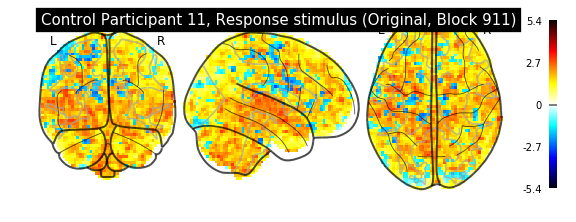

01/15/2019 20:46:51 Reconstruction Error (Frobenius Norm): 2.48838226e+02 out of 2.26037567e+02


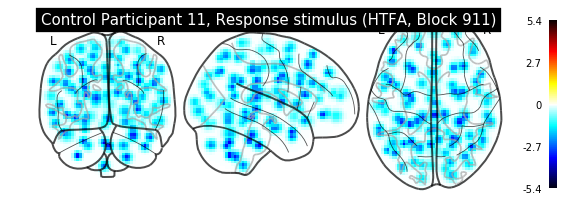

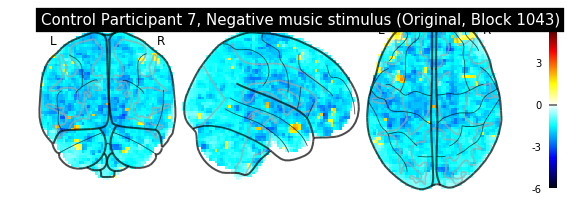

01/15/2019 20:46:56 Reconstruction Error (Frobenius Norm): 6.99581665e+02 out of 6.51863892e+02


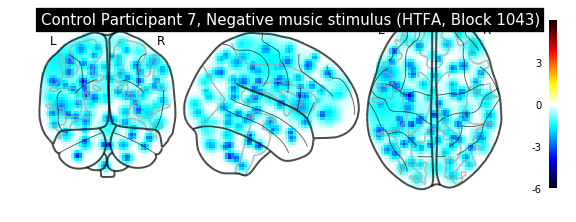

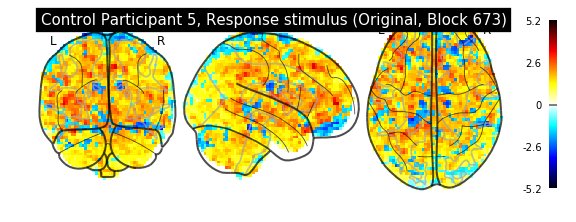

01/15/2019 20:47:00 Reconstruction Error (Frobenius Norm): 2.52199387e+02 out of 2.26144638e+02


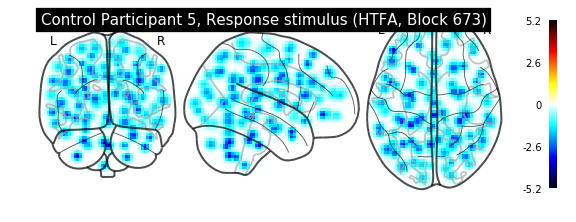

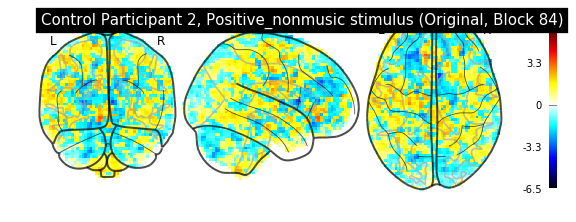

01/15/2019 20:47:04 Reconstruction Error (Frobenius Norm): 8.46890198e+02 out of 7.13168579e+02


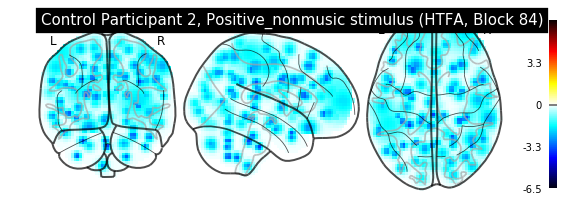

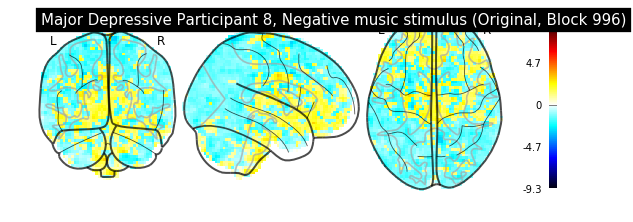

01/15/2019 20:47:09 Reconstruction Error (Frobenius Norm): 6.84343689e+02 out of 5.71695251e+02


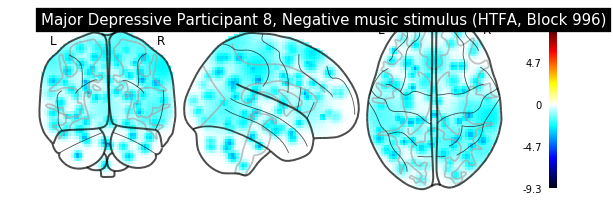

In [17]:
for b in np.random.choice(range(htfa.num_blocks), 5):
    htfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    htfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

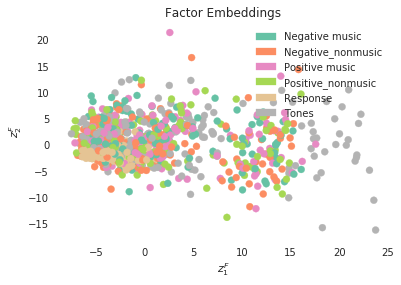

In [18]:
#factor 'embeddings' with PCA
htfa.scatter_factor_embedding(labeler=task_labeler, embedding='PCA')

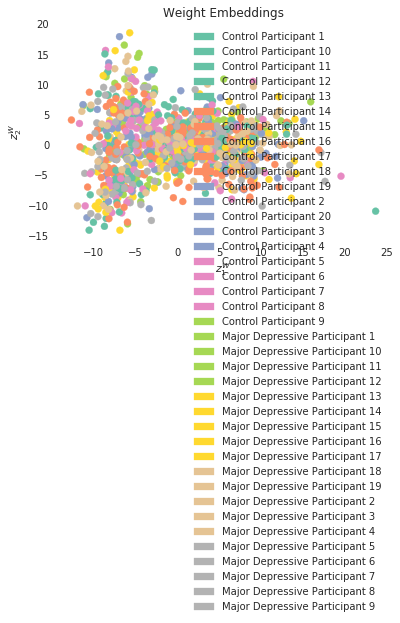

In [19]:
#weight 'embeddings' with PCA
htfa.scatter_weight_embedding(labeler=subject_labeler, embedding='PCA')

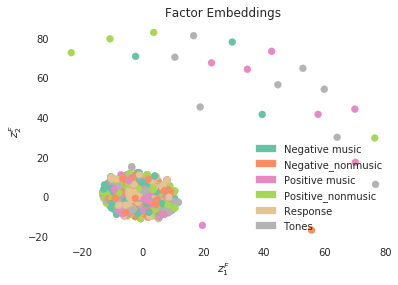

In [20]:
#factor 'embeddings' with TSNE
htfa.scatter_factor_embedding(labeler=task_labeler, embedding='TSNE')

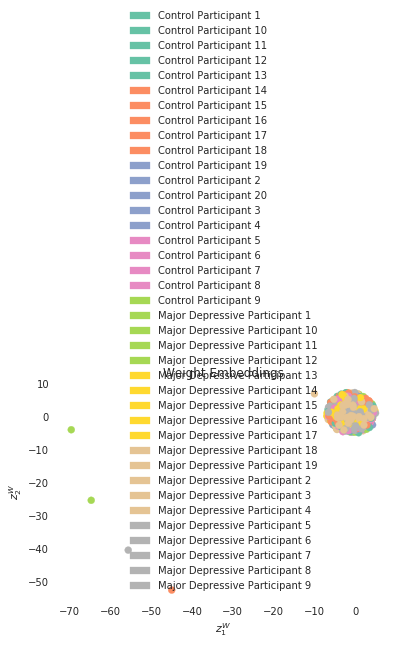

In [21]:
#weight 'embeddings' with TSNE
htfa.scatter_weight_embedding(labeler=subject_labeler, embedding='TSNE')

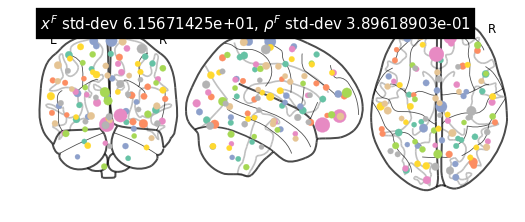

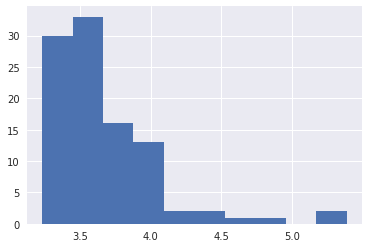

(<nilearn.plotting.displays.OrthoProjector at 0x7f505059a588>,
 tensor([[-3.3505e+01, -8.5661e+01, -1.0389e+01],
         [ 5.0005e+01,  1.5407e+01, -4.0378e-01],
         [-1.0549e+00,  3.6485e+01,  1.1637e+01],
         [-1.7633e+01, -3.4901e+01,  4.2770e+01],
         [ 2.0888e+01, -5.2496e+01, -5.1280e+01],
         [ 3.8761e+01, -5.0672e+01,  5.5699e+01],
         [-2.5252e+01, -3.7917e+01, -3.3600e+01],
         [ 2.6295e+00,  2.9973e+01,  5.8571e+01],
         [-3.0482e+01, -6.3378e+00,  4.6064e+00],
         [ 2.4497e+01, -5.3997e+01,  1.4447e+01],
         [ 1.9037e+01, -6.0346e+01, -1.3280e+01],
         [ 4.6456e+01, -2.7545e+00,  4.8469e+01],
         [-4.1455e+01, -4.6215e+01,  5.7479e+01],
         [ 1.1644e+01, -6.9052e+01,  5.5062e+01],
         [-2.5697e+01, -6.6247e+00,  3.2528e+01],
         [-4.3703e+01,  4.0991e+01, -5.5949e+00],
         [ 2.4722e+01,  5.9011e+01,  1.4947e+01],
         [ 3.7539e+01, -8.0894e+01,  1.3918e+01],
         [ 4.1438e+01,  3.9967e+01,  

In [22]:
htfa.visualize_factor_template()

In [23]:
htfa.average_reconstruction_error()

IndexError: index 1 is out of bounds for dimension 0 with size 1